### torchvision 제공 이미지 전처리 관련 기능
- torchvision.transforms 서브 모듈
    * 이미지 크기 조절
    * 이미지 정규화
    * 이미지 자르기
    * 이미지 회전 등등 다양한 기능 제공
    * 이미지 데이터 타입 ==> Pillow Image

In [159]:
# 모듈 로딩
import cv2                              # ==> 이미지 데이터 ndarray
from PIL import Image                   # %pip install pillow ==> 이미지 데이터 JpegImage
import numpy as np
import matplotlib.pyplot as plt

from torchvision.transforms import v2 # pytorch 지원 이미지 변환 관련 모듈
import torch

In [3]:
# 데이터 관련 설정
IMG_PATH = '/Users/anhyojun/WorkSpace/LocalData/pokemon/'
IMG_FILE = IMG_PATH+'2.jpg'

- openCV & pillow <hr>

In [4]:
cv_img = cv2.imread(IMG_FILE)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) # BGR => RGB

pil_img = Image.open(IMG_FILE)

In [5]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


- 인스턴스와 메서드 <hr>
    * 인스턴스(Instance) : 메모리(힙)에 존재하는(저장된) 데이터의 종류를 명시해서 부르는 용어
        - 예) 정수 인스턴스, vgg인스턴스, 사람 인스턴스
    * 속성(Attribute/Field) : 클래스가 가지는 특징, 외형, 내형, 성격
    * 메서드(Method) : 클래스가 가지는 기능, 역할 ==> 문법 구조는 함수와 동일

In [139]:
from typing import Any


class A:
    # 인스턴스를 생성해주는 메서드
    def __init__(self, num, loc):
        self.num = num      # 인스턴스 속성
        self.loc = loc      # 인스턴스 속성
        print('__init__()')
        
    # 연산자(+, -, *, /, //, %, **)기능과 연결된 매직 메서드
    def __add__(self, other):
        print('__add__()')
        return self.num + other.num
    
    def __mul__(self, other):
        print('__mul__()')
        return self.loc * other.num
    
    # 인스턴스 변수명으로 호출되는 메서드
    def __call__(self, value):
        print('__call__()')

    # A 클래스로 생성된 인스턴스 전용의 메서드
    def test(self, food):
        print(self.loc, food)

In [145]:
# 인스턴스 생성 => A(10, '대구')
a1 = A(10, '대구')
a2 = A(100, '부산')

print(a1.loc)
a1.test('치맥')

print(a1*a1)

a1(20)

__init__()
__init__()
대구
대구 치맥
__mul__()
대구대구대구대구대구대구대구대구대구대구
__call__()


In [146]:
A(5, '경주')(8888)
a1(9)

__init__()
__call__()
__call__()


In [137]:
a1.num + a2.num

110

- Resize 이미지 크기 변경 <hr>

In [177]:
# v2.Resize() 클래스
# img => tensor
print(cv_img.shape)

imgTS = v2.ToImage()(cv_img)
imgTS2 = v2.Resize(size=(40, 40), interpolation=v2.InterpolationMode.BILINEAR)(imgTS)

print(imgTS2.shape)

(221, 300, 3)
torch.Size([3, 40, 40])


In [178]:
# v2.Compose() 클래스 : 이미지에 진행할 여러가지 전처리를 하나로 묶음 처리 즉, pipeline 설정
print(cv_img.shape)

tras = v2.Compose(
    [
        v2.ToImage(),
        v2.Resize(size=(230,120), interpolation=v2.InterpolationMode.BILINEAR)
    ]
)
imgTS = tras(cv_img)

print(imgTS.shape)

(221, 300, 3)
torch.Size([3, 230, 120])


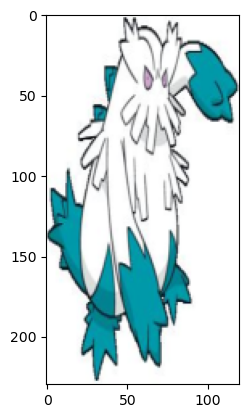

In [176]:
plt.imshow(imgTS.permute(1,2,0))

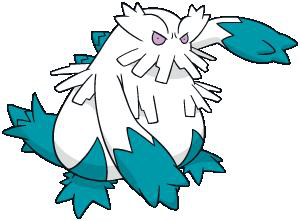

In [6]:
pil_img

In [ ]:
# v2.Resize() 클래스
# img => tensor
v2.ToTensor()

v2.Resize()